## 딥러닝에서 매개변수 업데이트의 중요성

딥러닝 모델의 성능은 매개변수 업데이트에 크게 의존합니다. 매개변수 업데이트가 중요한 이유는 다음과 같습니다:

### 1. 손실 최소화
딥러닝 모델의 목표는 손실 함수의 값을 최소화하는 것입니다. 매개변수 업데이트는 경량 경량화의 기울기를 계산하여 손실을 줄이는 방향으로 가중치를 조정합니다. 이를 통해 모델의 예측 정확도를 향상시킬 수 있습니다.

### 2. 학습 과정
매개변수 업데이트는 학습 과정의 핵심입니다. 각 반복(iteration)마다 매개변수가 조정되며, 이는 모델이 데이터에 적응하고 최적의 성능을 발휘할 수 있도록 돕습니다. 학습률(learning rate)은 이 과정에서 조정의 크기를 결정합니다.

### 3. 일반화
효과적인 매개변수 업데이트는 모델이 학습 데이터에 과적합(overfitting)되는 것을 방지합니다. 정규화(regularization) 기법과 같은 매개변수 업데이트는 모델이 새로운 데이터에 대해 잘 일반화되도록 돕습니다.

### 4. 성능 향상
매개변수 업데이트는 신경망의 성능을 지속적으로 향상시킵니다. 적절한 매개변수 조정은 학습 중 더 나은 예측 결과를 도출할 수 있게 하며, 이는 최종적으로 모델의 성능을 극대화하는 데 기여합니다.

### 5. 최적화 알고리즘
다양한 최적화 알고리즘(예: SGD, Adam 등)은 매개변수 업데이트 방법에 따라 성능이 달라집니다. 각 알고리즘은 업데이트 전략을 다르게 하여 학습의 효율성을 높이거나 수렴 속도를 조절합니다.

### 결론
딥러닝에서 매개변수 업데이트는 모델 학습의 핵심 요소로, 손실 최소화, 일반화, 성능 향상에 필수적입니다. 따라서 올바른 매개변수 업데이트 기법을 선택하는 것이 중요합니다.


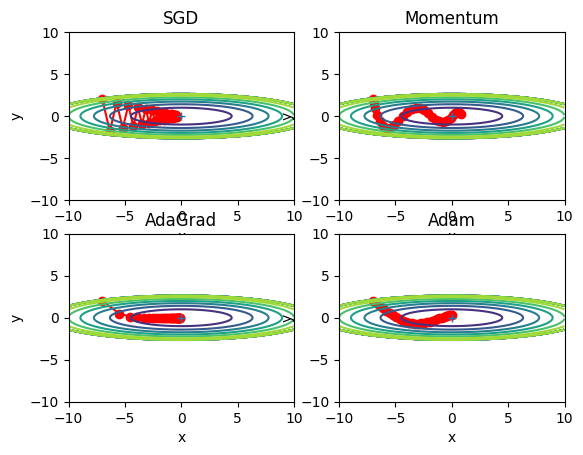

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()


===========iteration:0===========
SGD:2.333357698191768
Momentum:2.3752513743477657
AdaGrad:2.0821618840621072
Adam:2.1715833373683187
===========iteration:100===========
SGD:1.4510980485569909
Momentum:0.29865109877653107
AdaGrad:0.12345792151578279
Adam:0.15113627455064835
===========iteration:200===========
SGD:0.8117546446647541
Momentum:0.3163364809279013
AdaGrad:0.09857164693797221
Adam:0.18776529785177354
===========iteration:300===========
SGD:0.5346796166702845
Momentum:0.18601228089299698
AdaGrad:0.059505165293892756
Adam:0.10652850911604499
===========iteration:400===========
SGD:0.4355547785380105
Momentum:0.1284745907209862
AdaGrad:0.04170251744304322
Adam:0.08407923703078377
===========iteration:500===========
SGD:0.4004881394934364
Momentum:0.19290414924483268
AdaGrad:0.09203518264129609
Adam:0.11962306174419747
===========iteration:600===========
SGD:0.34333953737125944
Momentum:0.0900596707306702
AdaGrad:0.0393269660343063
Adam:0.0600733553465098
===========iteration:7

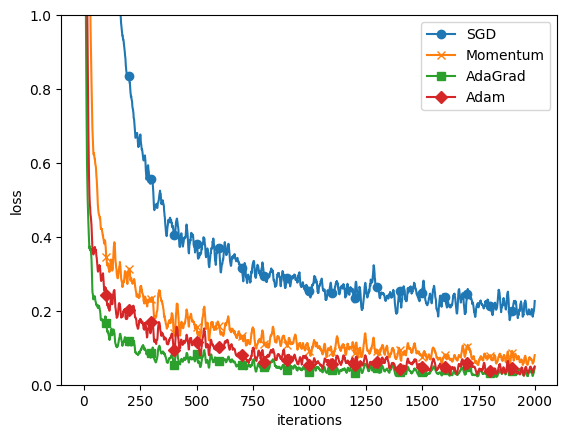

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


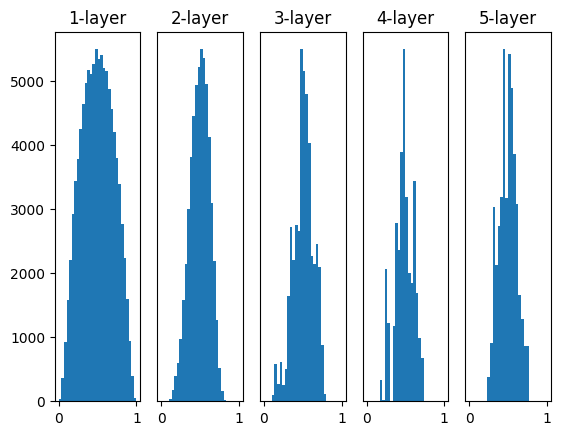

In [4]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


### 가중치 초기화 방법

딥러닝에서 가중치 초기화는 효과적인 학습을 위해 매우 중요합니다. 아래는 널리 사용되는 두 가지 가중치 초기화 방법인 Xavier 초기화와 He 초기화에 대한 설명입니다.

---

#### **1. Xavier 초기화 (Glorot 초기화)**

Xavier 초기화는 주로 **시그모이드(sigmoid)**나 **하이퍼볼릭 탄젠트(tanh)** 같은 활성화 함수와 함께 사용됩니다. 이 방법은 입력과 출력의 분산이 일정하게 유지되도록 가중치를 초기화하여 학습이 원활하게 이루어지도록 돕습니다.

- **공식**:  
  $( W \sim \mathcal{N}(0, \frac{1}{n_{\text{in}}}) $)
  여기서 $( n_{\text{in}} $)은 이전 층의 뉴런 수를 의미합니다.

- **목적**: 각 층의 입력이 지나치게 크거나 작아지는 문제를 방지하여, 신경망이 빠르게 수렴할 수 있도록 돕습니다.

---

#### **2. He 초기화**

He 초기화는 **ReLU** 계열의 활성화 함수와 함께 주로 사용됩니다. ReLU 함수는 0보다 작은 값을 모두 0으로 만들어버리기 때문에, Xavier 초기화보다 더 큰 분산을 갖는 가중치 초기화가 필요합니다.

- **공식**:  
  $( W \sim \mathcal{N}(0, \frac{2}{n_{\text{in}}}) $)  
  여기서 $( n_{\text{in}} $)은 이전 층의 뉴런 수를 의미합니다.

- **목적**: ReLU 활성화 함수에 적합한 가중치 분포를 제공하여, 학습 초기 단계에서 각 층의 출력 분산이 적절하게 유지되도록 합니다.

---

이 두 가지 방법은 신경망의 학습을 안정적으로 진행시키는 데 중요한 역할을 합니다. 적절한 초기화를 통해 학습의 속도와 성능을 향상시킬 수 있습니다.


===========iteration:0===========
std=0.01:2.3025000326957707
Xavier:2.3050123331548127
He:2.3875934666176883
===========iteration:100===========
std=0.01:2.3030423012031562
Xavier:2.2371285666612963
He:1.6380973181535938
===========iteration:200===========
std=0.01:2.3013605101449697
Xavier:2.1008206925918165
He:0.8115950180449345
===========iteration:300===========
std=0.01:2.3042534286332006
Xavier:1.8528526937765264
He:0.44103046288999015
===========iteration:400===========
std=0.01:2.3002617995104484
Xavier:1.3362743537561568
He:0.33693113314632284
===========iteration:500===========
std=0.01:2.303095977292968
Xavier:1.0183185816701632
He:0.4120642473866117
===========iteration:600===========
std=0.01:2.2996285942699712
Xavier:0.704616602585942
He:0.35290212656808473
===========iteration:700===========
std=0.01:2.302338569896679
Xavier:0.5048549095258865
He:0.2427816630455438
===========iteration:800===========
std=0.01:2.3027418812687728
Xavier:0.5656636014935614
He:0.32948728506

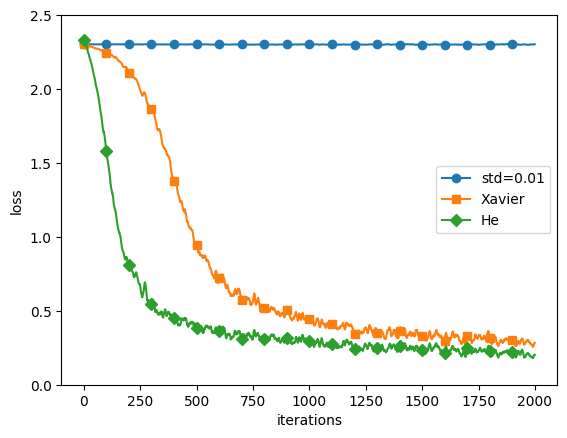

In [5]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


### 배치 정규화의 딥러닝에서의 중요성

배치 정규화(Batch Normalization, BN)는 딥러닝 모델의 훈련 과정을 개선하기 위해 널리 사용되는 기법입니다. 배치 정규화의 중요성은 다음과 같습니다:

### 1. 학습 속도 향상
배치 정규화는 각 층의 출력을 정규화하여 입력 데이터의 분포를 일정하게 유지합니다. 이를 통해 학습이 안정화되고, 더 큰 학습률을 사용할 수 있어 훈련 속도가 빨라집니다.

#### 예시
각 층의 출력 \( x \)에 대해, 배치 정규화는 다음과 같은 과정을 거칩니다:

$$
\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$

여기서 \( \mu \)는 미니배치의 평균, \( \sigma^2 \)는 분산, \( \epsilon \)은 수치적 안정성을 위한 작은 값입니다. 정규화된 출력을 사용하여 더 빠른 학습이 가능해집니다.

### 2. 내부 공변량 변화 감소
딥러닝 모델에서 층이 깊어질수록 입력 분포가 변하는 현상(내부 공변량 변화)이 발생합니다. 배치 정규화는 각 층의 출력이 정규화되어 이러한 변화를 줄여줍니다.

#### 예시
기존에는 각 층의 출력이 다음 층의 입력 분포에 영향을 미쳤으나, 배치 정규화를 사용하면 각 층에서의 변화가 다음 층으로 전달되는 방식이 다음과 같이 변합니다:

$$
Y = \text{Activation}(\hat{X}W + b)
$$

여기서 \( \hat{X} \)는 정규화된 출력입니다.

### 3. 과적합 방지
배치 정규화는 일종의 정규화 역할을 하여 모델의 과적합을 방지합니다. 미니배치에서의 통계적 특성을 활용하여, 모델이 데이터에 지나치게 적합되는 것을 막아줍니다.

#### 예시
모델이 훈련 데이터에 과적합되는 상황에서 배치 정규화는 미니배치의 평균과 분산을 사용하여 각 배치마다 출력의 변동성을 증가시킵니다.

### 4. 비선형 활성화 함수의 효율성 증가
배치 정규화는 활성화 함수(예: ReLU)의 입력을 정규화하여 더 나은 출력 분포를 생성합니다. 이는 비선형 활성화 함수의 효과를 극대화하고, 모델의 표현력을 높입니다.

#### 예시
정규화된 출력 \( \hat{x} \)를 ReLU 활성화 함수에 적용하면 다음과 같이 표현됩니다:

$$
y = \text{ReLU}(\hat{x})
$$

이 과정은 활성화 함수의 비선형성을 증대시킵니다.

### 5. 더 깊은 네트워크 훈련 가능
배치 정규화 덕분에 깊은 네트워크를 안정적으로 훈련할 수 있습니다. 이를 통해 더 복잡한 모델을 사용할 수 있으며, 다양한 태스크에서의 성능을 향상시킬 수 있습니다.

#### 예시
배치 정규화를 추가한 ResNet과 같은 깊은 네트워크는 일반적으로 더 깊은 네트워크를 효과적으로 훈련할 수 있습니다. 이들은 배치 정규화를 통해 안정된 기울기를 유지하고, 더 높은 정확도를 달성합니다.

### 결론
배치 정규화는 딥러닝 모델의 훈련 과정을 개선하는 데 매우 중요한 역할을 합니다. 학습 속도를 향상시키고, 내부 공변량 변화 문제를 해결하며, 과적합을 방지하는 등 여러 가지 이점을 제공합니다. 따라서 현대의 딥러닝 모델에서 필수적인 기법으로 자리잡고 있습니다.


============== 1/16 ==============
epoch:0 | 0.099 - 0.075
epoch:1 | 0.097 - 0.111
epoch:2 | 0.097 - 0.163
epoch:3 | 0.097 - 0.201


c:\study\00_core\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:4 | 0.097 - 0.231
epoch:5 | 0.097 - 0.232
epoch:6 | 0.097 - 0.25
epoch:7 | 0.097 - 0.278
epoch:8 | 0.097 - 0.298
epoch:9 | 0.097 - 0.309
epoch:10 | 0.097 - 0.326
epoch:11 | 0.097 - 0.349
epoch:12 | 0.097 - 0.359
epoch:13 | 0.097 - 0.376
epoch:14 | 0.097 - 0.405
epoch:15 | 0.097 - 0.41
epoch:16 | 0.097 - 0.412
epoch:17 | 0.097 - 0.427
epoch:18 | 0.097 - 0.447
epoch:19 | 0.097 - 0.46
============== 2/16 ==============
epoch:0 | 0.097 - 0.109
epoch:1 | 0.099 - 0.118
epoch:2 | 0.092 - 0.125
epoch:3 | 0.099 - 0.154


C:\Users\hopio\AppData\Local\Temp\ipykernel_104820\3333961149.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 범례를 그래프 밖으로 표시


epoch:4 | 0.099 - 0.177
epoch:5 | 0.099 - 0.194
epoch:6 | 0.105 - 0.219
epoch:7 | 0.117 - 0.24
epoch:8 | 0.117 - 0.266
epoch:9 | 0.117 - 0.286
epoch:10 | 0.117 - 0.302
epoch:11 | 0.117 - 0.324
epoch:12 | 0.117 - 0.349
epoch:13 | 0.117 - 0.361
epoch:14 | 0.117 - 0.392
epoch:15 | 0.117 - 0.406
epoch:16 | 0.117 - 0.421
epoch:17 | 0.117 - 0.441
epoch:18 | 0.117 - 0.453
epoch:19 | 0.117 - 0.477
============== 3/16 ==============
epoch:0 | 0.159 - 0.114
epoch:1 | 0.416 - 0.112
epoch:2 | 0.611 - 0.167
epoch:3 | 0.674 - 0.221
epoch:4 | 0.736 - 0.261
epoch:5 | 0.819 - 0.31
epoch:6 | 0.868 - 0.337
epoch:7 | 0.888 - 0.376
epoch:8 | 0.926 - 0.406
epoch:9 | 0.945 - 0.429
epoch:10 | 0.958 - 0.457
epoch:11 | 0.968 - 0.477
epoch:12 | 0.981 - 0.511
epoch:13 | 0.983 - 0.534
epoch:14 | 0.984 - 0.561
epoch:15 | 0.987 - 0.58
epoch:16 | 0.989 - 0.596
epoch:17 | 0.993 - 0.62
epoch:18 | 0.996 - 0.625
epoch:19 | 0.998 - 0.639
============== 4/16 ==============
epoch:0 | 0.07 - 0.107
epoch:1 | 0.212 - 0.107
epo

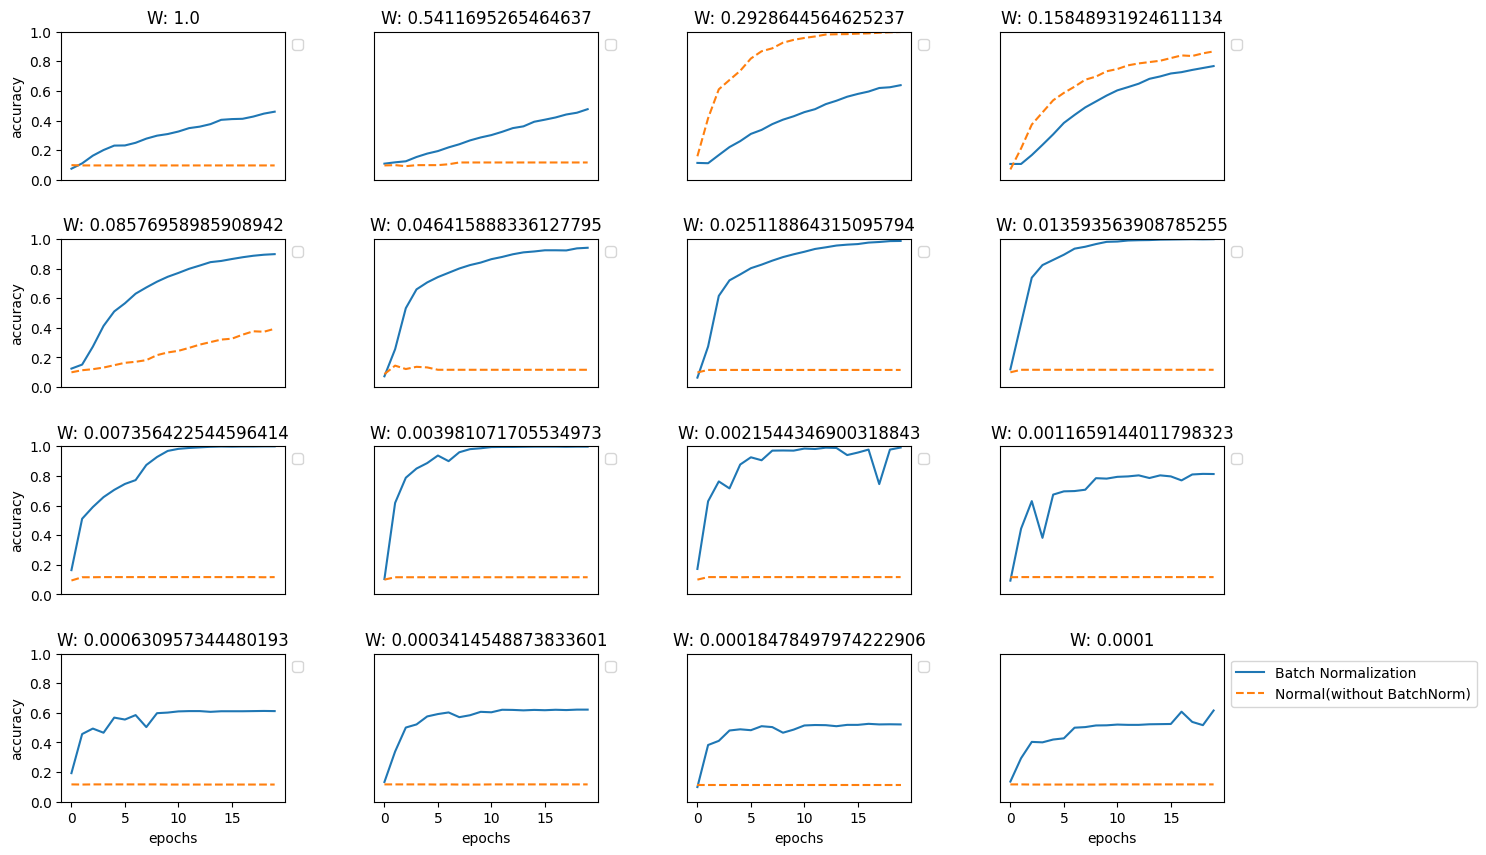

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

fig, axs = plt.subplots(4, 4, figsize=(15, 10))  # 그래프 크기 조정
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 서브플롯 간의 간격 조정

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    ax = axs[i // 4, i % 4]  # 서브플롯 선택
    ax.set_title("W: " + str(w))
    
    if i == 15:
        ax.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        ax.plot(x, train_acc_list, linestyle="--", label='Normal(without BatchNorm)', markevery=2)
    else:
        ax.plot(x, bn_train_acc_list, markevery=2)
        ax.plot(x, train_acc_list, linestyle="--", markevery=2)

    ax.set_ylim(0, 1.0)
    if i % 4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("accuracy")
    
    if i < 12:
        ax.set_xticks([])
    else:
        ax.set_xlabel("epochs")
    
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 범례를 그래프 밖으로 표시

plt.show()



epoch:0, train acc:0.09666666666666666, test acc:0.0778
epoch:1, train acc:0.10333333333333333, test acc:0.0823
epoch:2, train acc:0.12, test acc:0.091
epoch:3, train acc:0.13333333333333333, test acc:0.1016
epoch:4, train acc:0.15333333333333332, test acc:0.1119
epoch:5, train acc:0.17666666666666667, test acc:0.1255
epoch:6, train acc:0.19666666666666666, test acc:0.1328
epoch:7, train acc:0.2, test acc:0.1483
epoch:8, train acc:0.21666666666666667, test acc:0.1665
epoch:9, train acc:0.23666666666666666, test acc:0.1798
epoch:10, train acc:0.26, test acc:0.2011
epoch:11, train acc:0.29, test acc:0.2216
epoch:12, train acc:0.31666666666666665, test acc:0.2381
epoch:13, train acc:0.3466666666666667, test acc:0.2592
epoch:14, train acc:0.36666666666666664, test acc:0.2798
epoch:15, train acc:0.3933333333333333, test acc:0.299
epoch:16, train acc:0.42, test acc:0.3134
epoch:17, train acc:0.43666666666666665, test acc:0.3256
epoch:18, train acc:0.45, test acc:0.3269
epoch:19, train acc:0.

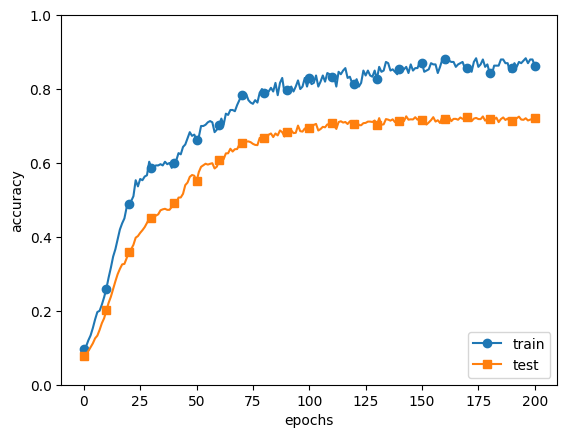

In [8]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


train loss:2.307182344545795
=== epoch:1, train acc:0.08333333333333333, test acc:0.0923 ===
train loss:2.3232016664281883
train loss:2.316491797429155
train loss:2.3310397921488737
=== epoch:2, train acc:0.08, test acc:0.0933 ===
train loss:2.322321926287815
train loss:2.3278634766016317
train loss:2.313456707274376
=== epoch:3, train acc:0.07666666666666666, test acc:0.094 ===
train loss:2.3264839484376036
train loss:2.320000329336898
train loss:2.308891867302382
=== epoch:4, train acc:0.08, test acc:0.0948 ===
train loss:2.3356287059102554
train loss:2.3185995983427494
train loss:2.342334820511012
=== epoch:5, train acc:0.08, test acc:0.0958 ===
train loss:2.3280507081723876
train loss:2.3160029198475107
train loss:2.2992513191902857
=== epoch:6, train acc:0.07666666666666666, test acc:0.0973 ===
train loss:2.309097695552474
train loss:2.3112602407530636
train loss:2.3063987782747186
=== epoch:7, train acc:0.08, test acc:0.0995 ===
train loss:2.3253455141762127
train loss:2.31559463

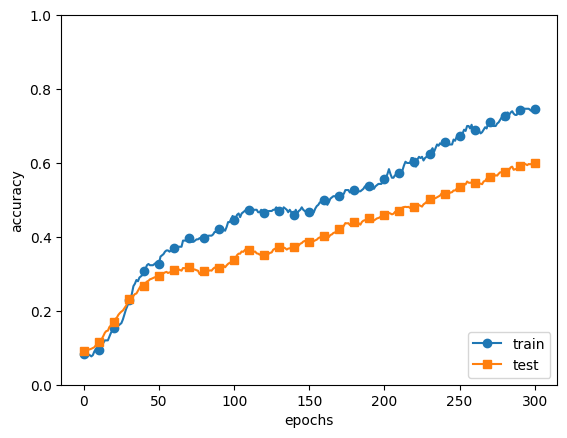

In [9]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


val acc:0.13 | lr:2.9217110346040626e-05, weight decay:3.0508803860768346e-08
val acc:0.27 | lr:0.0017756629796091554, weight decay:5.054052180238443e-07
val acc:0.45 | lr:0.003616112003489832, weight decay:2.26205163770662e-08
val acc:0.45 | lr:0.0019731132054980507, weight decay:8.279112853692363e-05
val acc:0.09 | lr:4.603519017915814e-06, weight decay:2.6232260618308983e-05
val acc:0.03 | lr:7.580526913631433e-05, weight decay:1.4770935527010787e-08
val acc:0.07 | lr:4.1393660987085305e-06, weight decay:2.351747131776291e-08
val acc:0.14 | lr:0.0003351585116127676, weight decay:8.40922800131238e-05
val acc:0.13 | lr:6.823858321551484e-05, weight decay:1.0584686791253525e-06
val acc:0.22 | lr:0.0018657499904464795, weight decay:6.376258111648893e-05
val acc:0.13 | lr:0.00042415627033146844, weight decay:1.5252262964608746e-07
val acc:0.11 | lr:0.00016928959871996817, weight decay:8.598932697477545e-06
val acc:0.1 | lr:0.0006927931187840738, weight decay:1.0226702150872728e-07
val ac

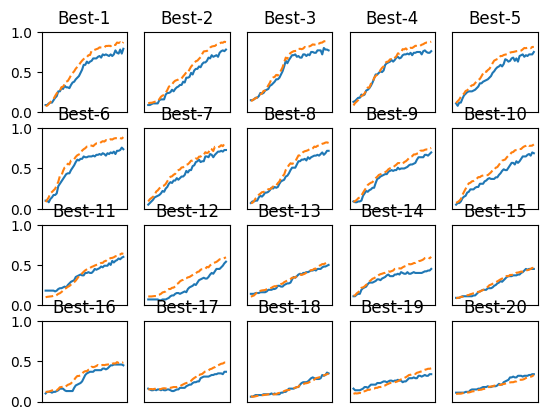

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
